In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('D:\\Data Science\\Years-of-experience-and-Salary\\Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


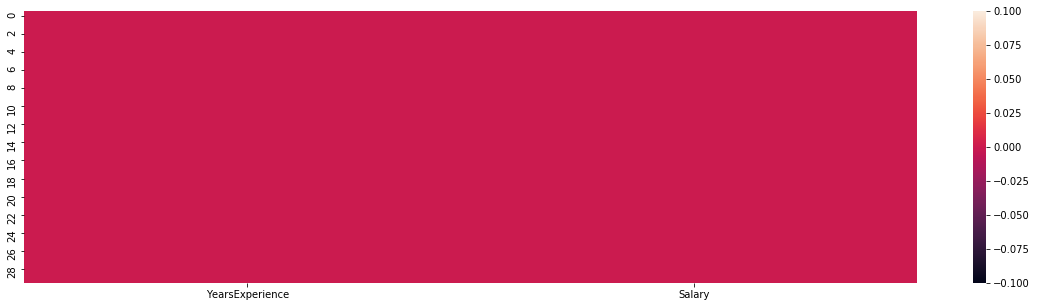

In [5]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(df.isna())
plt.show()

# By the above Figure We can Come to a Conclusion that there are no NULL Values

# Exploratory Data Analysis

# Univariate Analysis

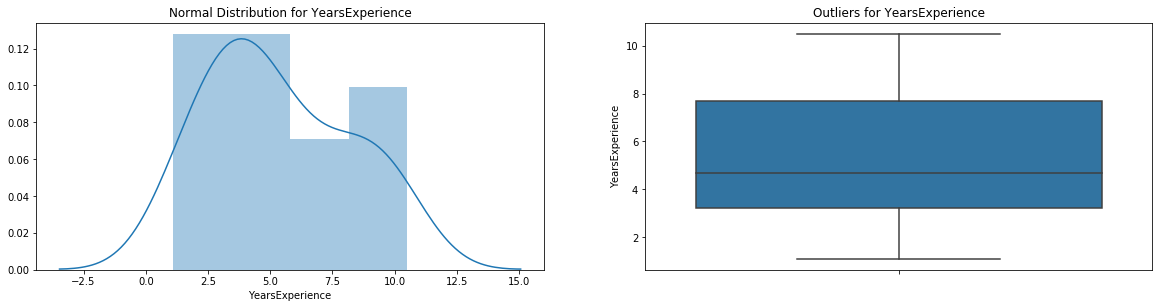

In [6]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df.YearsExperience)
plt.title('Normal Distribution for YearsExperience')
plt.subplot(2,2,2)
sns.boxplot(y=df.YearsExperience)
plt.title('Outliers for YearsExperience')
plt.show()

In [7]:
print('Skewness : '+str(df.YearsExperience.skew()))
print('Kurtosis : '+str(df.YearsExperience.kurtosis()))

Skewness : 0.37956024064804106
Kurtosis : -1.0122119403325072


# By the above figures YearsExperience is normally distributed and have No Outliers

# Does not have any Skewness and Kurtosis

# Bivariate Analysis

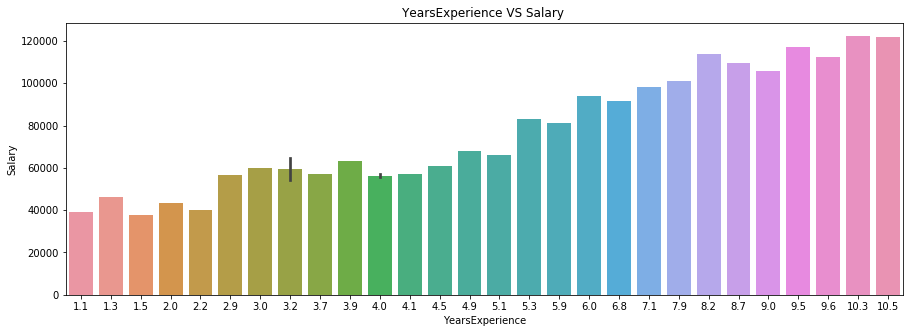

In [8]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=df.YearsExperience,y=df.Salary)
plt.title('YearsExperience VS Salary ')
plt.show()

# We can Observe that has the YearsExperience increases Salary also Increases

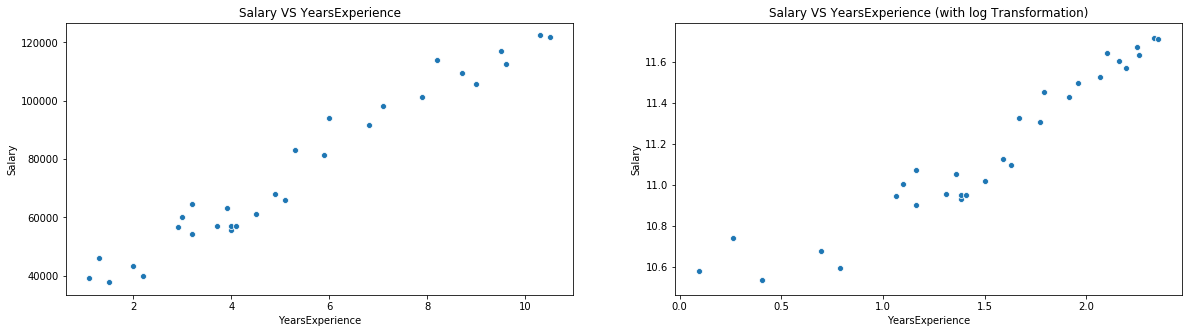

In [9]:
dummy=df.copy()
fig=plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.scatterplot(x=df.YearsExperience,y=df.Salary)
plt.title('Salary VS YearsExperience')

plt.subplot(1,2,2)
sns.scatterplot(x=np.log(df.YearsExperience),y=np.log(df.Salary))
plt.title('Salary VS YearsExperience (with log Transformation)')

plt.show()

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


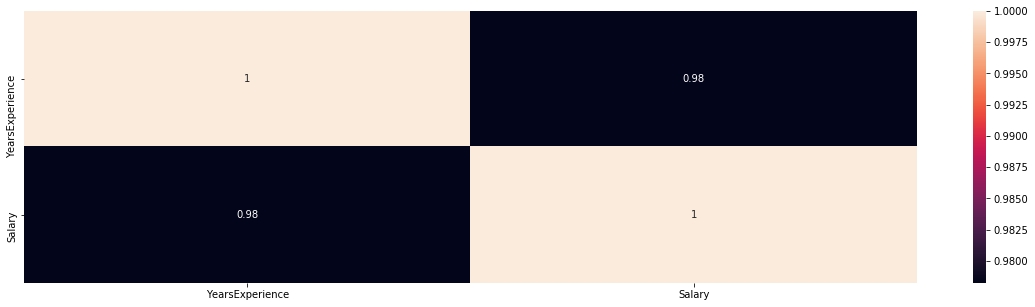

In [11]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Salary and YearsExperience are strongly Correlated

# Fig. 1 looks in the form of y=mx+c which gives more accuracy than other transformations

In [12]:
x=df.YearsExperience
y=df.Salary

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [14]:
x_train.shape

(20,)

In [15]:
y_train.shape

(20,)

In [16]:
x_train=x_train.values.reshape(-1, 1)

In [17]:
y_train=y_train.values.reshape(-1, 1)

In [18]:
x_test=x_test.values.reshape(-1, 1)

In [19]:
y_test=y_test.values.reshape(-1, 1)

In [20]:
x_train.shape

(20, 1)

In [21]:
y_train.shape

(20, 1)

In [22]:
y_test.shape

(10, 1)

In [23]:
x_test.shape

(10, 1)

In [24]:
def fit_ml_algo(algo,x_train,y_train,cv):
    
    model=algo.fit(x_train,y_train)
    acc=round(model.score(x_train,y_train)*100,5)
    train_pred = model_selection.cross_val_predict(algo,x_train,y_train,cv=cv,n_jobs=None)
    #acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return(train_pred, acc)

In [25]:
train_pred_log, acc_log =  fit_ml_algo( LinearRegression(), x_train, y_train, 10)
print("Accuracy: "+str(acc_log)+' %')
#print("Accuracy CV 10-Fold: "+str(acc_cv_log))

Accuracy: 93.819 %


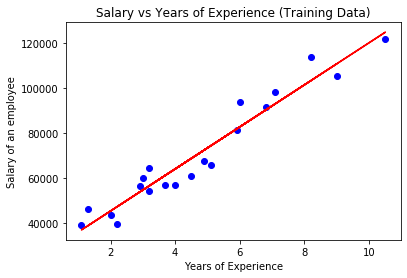

In [26]:
model=LinearRegression().fit(x_train,y_train)


plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='red')
plt.title('Salary vs Years of Experience (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

In [27]:
train_pred_log, acc_log =  fit_ml_algo( LinearRegression(), x_test, y_test, 10)
print("Accuracy: "+str(acc_log)+' %')
#print("Accuracy CV 10-Fold: "+str(acc_cv_log))

Accuracy: 97.96341 %


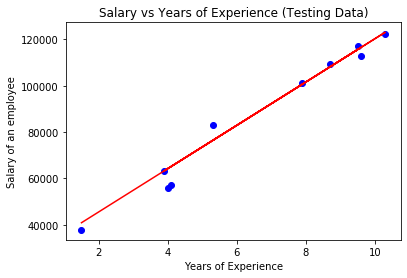

In [28]:
model=LinearRegression().fit(x_train,y_train)


plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,model.predict(x_test),color='red')
plt.title('Salary vs Years of Experience (Testing Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

In [29]:
from sklearn.metrics import r2_score
round(r2_score(y_test,model.predict(x_test)),5)

0.97492